# Investigate IMDB Dataset 
### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#DataCleaning">Data Cleaning & Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> IMDB Dataset over view:

>We have dataset about the movies around the world needs analysis to extract useful information about movies, production companies, trends, and correlations in world of movies from 1960 to 2015. let's take a look at the useful variables we have: (revenue_adj, budget_adj, original_title, cast, director, runtime, genres, production_companies, vote_average, release_year) so we will work on most of these to gain insights as much as possible.
<ul>
<li>Let's begain our journy.</li>
</ul>

In [1]:
# Importing libraries and open the files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

imdb_pd = pd.read_csv("imdb-movies.csv")

# Assessing the dataset

In [2]:
imdb_pd.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
imdb_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
imdb_pd.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
imdb_pd.vote_average.value_counts()

6.1    496
6.0    495
5.8    486
5.9    473
6.2    464
      ... 
8.6      1
8.9      1
9.2      1
2.0      1
8.7      1
Name: vote_average, Length: 72, dtype: int64

In [6]:
imdb_pd.genres.value_counts()

Comedy                                      712
Drama                                       712
Documentary                                 312
Drama|Romance                               289
Comedy|Drama                                280
                                           ... 
Adventure|Animation|Romance                   1
Family|Animation|Drama                        1
Action|Adventure|Animation|Comedy|Family      1
Action|Adventure|Animation|Fantasy            1
Mystery|Science Fiction|Thriller|Drama        1
Name: genres, Length: 2039, dtype: int64

<a id='DataCleaning'></a>
# Data Cleaning

In [7]:
# There are some data need to be cleaned.
# 1- Drop unnecessary columns for the analysis.
# 2- Drop the null values.
# 3- Drop the duplicated

imdb = imdb_pd.copy()

In [8]:
#Drop the unused columns(id and imdb_id)
imdb.drop(["id","imdb_id", "cast", "homepage", "tagline", "overview", "release_date", "keywords","production_companies"], axis=1, inplace=True)
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   director        10822 non-null  object 
 5   runtime         10866 non-null  int64  
 6   genres          10843 non-null  object 
 7   vote_count      10866 non-null  int64  
 8   vote_average    10866 non-null  float64
 9   release_year    10866 non-null  int64  
 10  budget_adj      10866 non-null  float64
 11  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1018.8+ KB


In [9]:
#Drop null rows
imdb.dropna(inplace=True)
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10801 non-null  float64
 1   budget          10801 non-null  int64  
 2   revenue         10801 non-null  int64  
 3   original_title  10801 non-null  object 
 4   director        10801 non-null  object 
 5   runtime         10801 non-null  int64  
 6   genres          10801 non-null  object 
 7   vote_count      10801 non-null  int64  
 8   vote_average    10801 non-null  float64
 9   release_year    10801 non-null  int64  
 10  budget_adj      10801 non-null  float64
 11  revenue_adj     10801 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1.1+ MB


In [10]:
# Check for duplicates
sum(imdb.duplicated())

1

In [11]:
# drop duplicates
imdb.drop_duplicates(inplace=True)

In [12]:
# confirm correction by rechecking for duplicates in the data
sum(imdb.duplicated())

0

## Reassessing after this clean.

In [13]:
imdb["director"].value_counts()

Woody Allen                  45
Clint Eastwood               34
Steven Spielberg             29
Martin Scorsese              29
Ridley Scott                 23
                             ..
Larry Shaw                    1
Laura Poitras                 1
Damon Beesley|Iain Morris     1
Bill Pohlad                   1
Harold P. Warren              1
Name: director, Length: 5056, dtype: int64

In [14]:
# Check for outliers
imdb["runtime"].max()

900

In [15]:
# Assess the outliers
imdb.nlargest(10,'runtime')

,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins,900,Documentary,14,9.2,2011,0.0,0.000000e+00
4041,0.469332,0,0,Taken,Breck Eisner|FÃ©lix EnrÃ­quez AlcalÃ¡|John Faw...,877,Science Fiction,38,6.8,2002,0.0,0.000000e+00
2722,0.537593,0,125000000,Band of Brothers,Phil Alden Robinson|Richard Loncraine|Mikael S...,705,Action|Drama|War,313,8.0,2001,0.0,1.539360e+08
6176,0.147489,0,0,Shoah,Claude Lanzmann,566,Documentary,16,8.3,1985,0.0,0.000000e+00
6894,0.137913,0,0,Planet Earth,Alastair Fothergill,550,Documentary,65,7.6,2006,0.0,0.000000e+00
2214,0.757082,120000000,0,The Pacific,Jeremy Podeswa|Tim Van Patten|David Nutter|Gra...,540,War|Drama|Action|Adventure|History,183,7.8,2010,120000000.0,0.000000e+00
3356,0.136540,0,0,John Adams,Tom Hooper,501,History|Drama,33,6.6,2008,0.0,0.000000e+00
1865,0.102223,0,0,Life,Martha Holmes|Simon Blakeney|Stephen Lyle,500,Documentary,24,7.0,2009,0.0,0.000000e+00
3141,0.336308,0,0,Generation Kill,Susanna White|Simon Cellan Jones,470,Drama|War|History,28,6.6,2008,0.0,0.000000e+00
2170,0.082894,0,0,The Pillars of the Earth,Sergio Mimica-Gezzan,421,Drama|History|Romance,22,7.3,2010,0.0,0.000000e+00


In [16]:
# Assess the outliers
imdb.nlargest(10,'vote_average')

,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins,900,Documentary,14,9.2,2011,0.0,0.0
538,0.114264,0,0,The Mask You Live In,Jennifer Siebel Newsom,88,Documentary,11,8.9,2015,0.0,0.0
1200,0.129531,0,0,Black Mirror: White Christmas,Carl Tibbetts,74,Drama|Horror|Mystery|Science Fiction|Thriller,41,8.8,2014,0.0,0.0
2269,0.222293,0,0,Life Cycles,Derek Frankowski,47,Documentary,27,8.8,2010,0.0,0.0
6911,0.212010,0,0,Pink Floyd: Pulse,David Mallet,145,Music,23,8.7,2006,0.0,0.0
3690,0.321341,0,0,The Art of Flight,Curt Morgan,80,Adventure|Documentary,60,8.5,2011,0.0,0.0
8221,0.194889,0,0,A Personal Journey with Martin Scorsese Throug...,Martin Scorsese|Michael Henry Wilson,225,Documentary,11,8.5,1995,0.0,0.0
8411,0.302908,0,0,Queen - Rock Montreal,Saul Swimmer,138,Music,14,8.5,1981,0.0,0.0
8839,0.157001,0,0,Dave Chappelle: Killin' Them Softly,Stan Lathan,57,Comedy,17,8.5,2000,0.0,0.0
609,0.033378,0,0,The Jinx: The Life and Deaths of Robert Durst,Andrew Jarecki,240,Documentary,72,8.4,2015,0.0,0.0


In [17]:
# Replace the 0 values with nan
imdb['budget_adj'] = imdb['budget_adj'].replace(0,np.nan)
imdb['revenue_adj'] = imdb['revenue_adj'].replace(0,np.nan)

In [18]:
# Check for 0 is changed to nan
imdb['revenue_adj'].tail(10)

10856   NaN
10857   NaN
10858   NaN
10859   NaN
10860   NaN
10861   NaN
10862   NaN
10863   NaN
10864   NaN
10865   NaN
Name: revenue_adj, dtype: float64

In [19]:
# Check for 0 is changed to nan
imdb['budget_adj'].tail(10)

10856              NaN
10857              NaN
10858              NaN
10859              NaN
10860              NaN
10861              NaN
10862              NaN
10863              NaN
10864              NaN
10865    127642.279154
Name: budget_adj, dtype: float64

In [20]:
# fill the empty budget fields with the mean of budget
budgetAdj_mean = imdb['budget_adj'].mean()
imdb['budget_adj'].fillna(budgetAdj_mean , inplace=True)

In [21]:
# Check the filling
imdb['budget_adj'].tail(10)

10856    3.692239e+07
10857    3.692239e+07
10858    3.692239e+07
10859    3.692239e+07
10860    3.692239e+07
10861    3.692239e+07
10862    3.692239e+07
10863    3.692239e+07
10864    3.692239e+07
10865    1.276423e+05
Name: budget_adj, dtype: float64

In [22]:
# fill the empty revenue fields with the mean of revenue
revenueAdj_mean = imdb['revenue_adj'].mean()
imdb['revenue_adj'].fillna(revenueAdj_mean , inplace=True)

In [23]:
# Check the filling
imdb['revenue_adj'].tail(10)

10856    1.151223e+08
10857    1.151223e+08
10858    1.151223e+08
10859    1.151223e+08
10860    1.151223e+08
10861    1.151223e+08
10862    1.151223e+08
10863    1.151223e+08
10864    1.151223e+08
10865    1.151223e+08
Name: revenue_adj, dtype: float64

In [24]:
# Check outliers for vote_average
imdb.nlargest(20,'vote_average')

,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins,900,Documentary,14,9.2,2011,3.692239e+07,1.151223e+08
538,0.114264,0,0,The Mask You Live In,Jennifer Siebel Newsom,88,Documentary,11,8.9,2015,3.692239e+07,1.151223e+08
1200,0.129531,0,0,Black Mirror: White Christmas,Carl Tibbetts,74,Drama|Horror|Mystery|Science Fiction|Thriller,41,8.8,2014,3.692239e+07,1.151223e+08
2269,0.222293,0,0,Life Cycles,Derek Frankowski,47,Documentary,27,8.8,2010,3.692239e+07,1.151223e+08
6911,0.212010,0,0,Pink Floyd: Pulse,David Mallet,145,Music,23,8.7,2006,3.692239e+07,1.151223e+08
3690,0.321341,0,0,The Art of Flight,Curt Morgan,80,Adventure|Documentary,60,8.5,2011,3.692239e+07,1.151223e+08
8221,0.194889,0,0,A Personal Journey with Martin Scorsese Throug...,Martin Scorsese|Michael Henry Wilson,225,Documentary,11,8.5,1995,3.692239e+07,1.151223e+08
8411,0.302908,0,0,Queen - Rock Montreal,Saul Swimmer,138,Music,14,8.5,1981,3.692239e+07,1.151223e+08
8839,0.157001,0,0,Dave Chappelle: Killin' Them Softly,Stan Lathan,57,Comedy,17,8.5,2000,3.692239e+07,1.151223e+08
609,0.033378,0,0,The Jinx: The Life and Deaths of Robert Durst,Andrew Jarecki,240,Documentary,72,8.4,2015,3.692239e+07,1.151223e+08


Seems that no outliers for vote average

<a id='eda'></a>
## Exploratory Data Analysis

> Explore the data visually to know what we will work on and ask the questions.


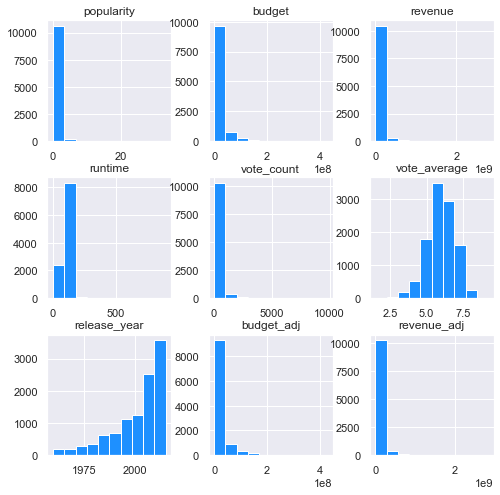

In [25]:
# Take a high-level picture of the distribution of data
imdb.hist(figsize=(8,8),color='dodgerblue');

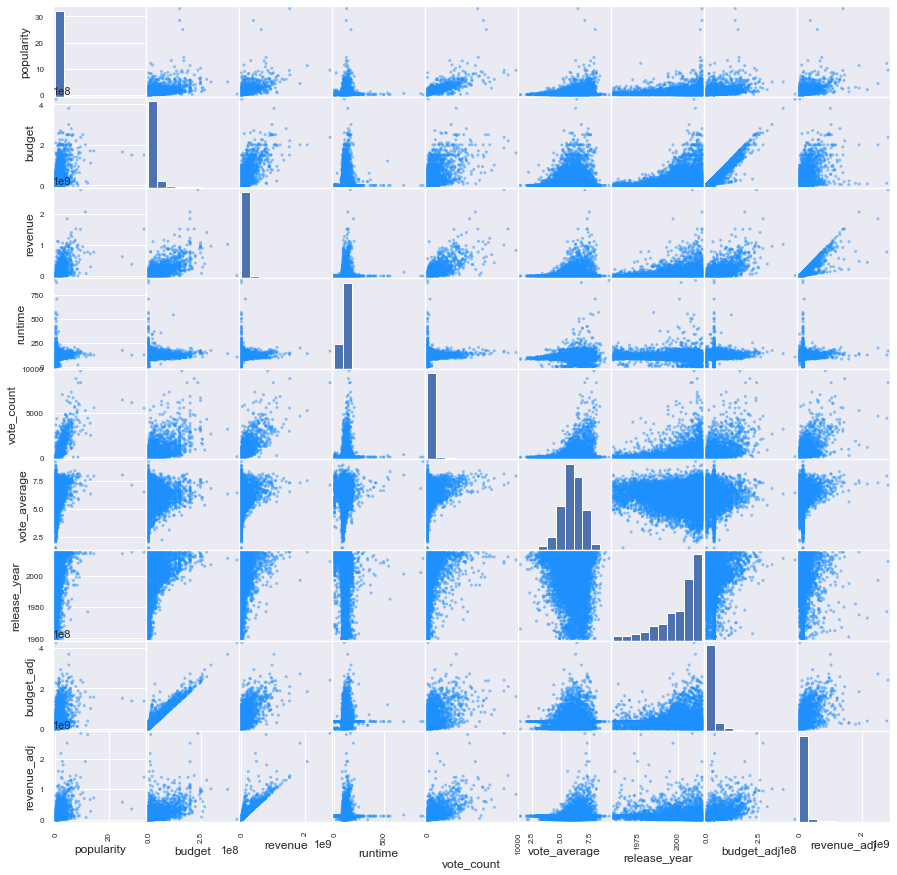

In [26]:
# Take a high-level picture of relationships in our data
pd.plotting.scatter_matrix(imdb,figsize=(15,15),color='dodgerblue');

After looking at the relationships, we can go further to focus on some of them to extract helpful insights. Without further ado, let's look at them...

# Now, we will introduce very useful information about movies, and let's begin with the movies count over the years, is it increasing, decreasing, or not following any trend!

> We need to know the prodcution level for the movies over the years.

> The next line chart shows that movies production slowly grew between 1960/1980, and a slightly higher increase between 1980/2000 and a very high increase in the 21st century.

>We choose line chart because it is simple and enough for our question to know if there any increase or decrease in movies over the years.

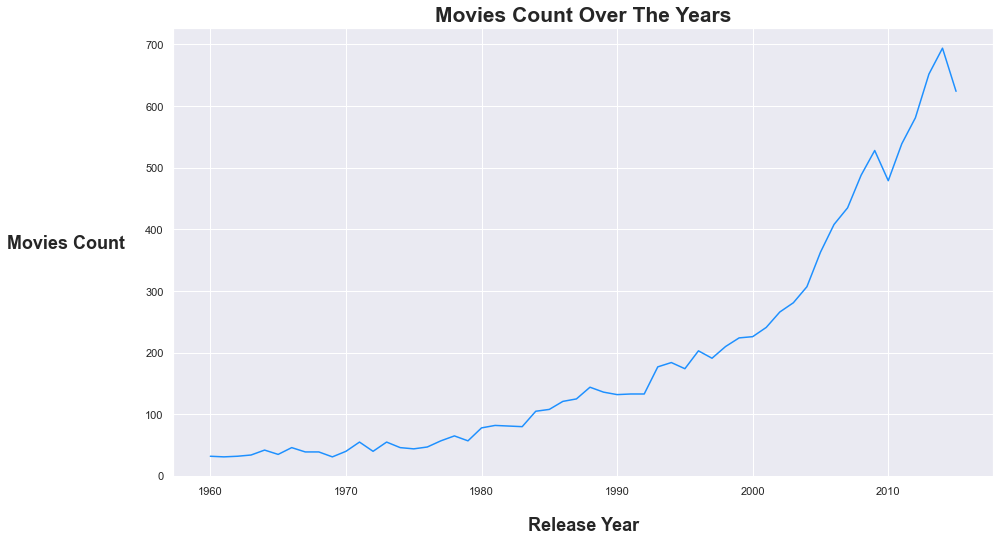

In [27]:
plt.figure(figsize=[14.70, 8.27])

X = imdb['release_year'].groupby(imdb['release_year']).count()

plt.plot(X,color='dodgerblue')
plt.xlabel("Release Year",fontsize=18, labelpad=20, weight='bold')
#plt.grid(alpha=0)
plt.ylabel("Movies Count",fontsize=18,rotation=0,ha="right", labelpad=20, weight='bold')
plt.title("Movies Count Over The Years",fontsize=21, weight='bold')
plt.show();

# After we know that the movies are increasing lately, Let's take a look at the distribution of the rates to know which rate is the most given.

> We want to know the most rate the people give to the movies.

> The next histogram shows that most highest movie rates are between 5 to 7 approximately.

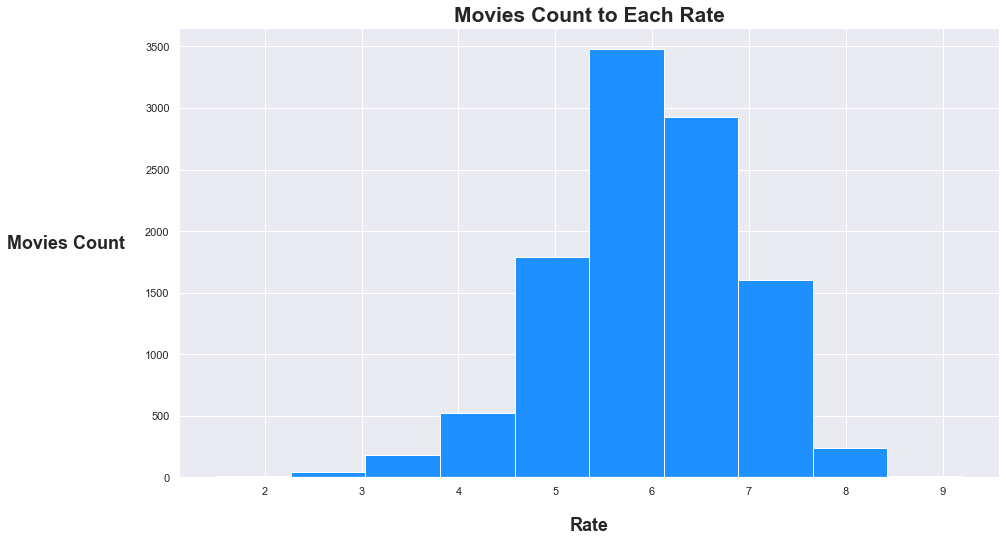

In [28]:
plt.figure(figsize=[14.70, 8.27])
imdb["vote_average"].hist(color='dodgerblue')
plt.xlabel("Rate",fontsize=18, labelpad=20, weight='bold')
# plt.grid(alpha=0)
plt.ylabel("Movies Count",fontsize=18,rotation=0,ha="right", labelpad=20, weight='bold')
plt.title("Movies Count to Each Rate",fontsize=21, weight='bold')
plt.show();

#### The last shape show us the range of the rating most given to movies is between 5.3 and 6.1 and that's the list of the most rates given to the movies

<ul>
<li>6.1    :    496 rate</li>

<li>6.0    :    495 rate</li>

<li>5.8    :    486 rate</li>

<li>5.9    :    473 rate</li>

<li>6.2    :    464 rate</li>

<li>6.3    :    461 rate</li>

<li>6.5    :    457 rate</li>

<li>6.4    :    446 rate</li>

<li>5.7    :    415 rate</li>

<li>6.6    :    413 rate</li>

<li>5.6    :    412 rate</li>
</ul>

#### It's between 5.6 and 6.1, and the variance is not huge, and the highest one is 6.1/10.

# So, we know the most given rate to movies, what about the distribution of the rates over the years, Is it have any trends?

> We chose a scatter plot because the 2 variables is quantitative and to measure the distribution between the release years and average rating to know if there is a relationship or not and the strength of it.

> The next scatter plot shows that over the years by increasing the number of movies, more low rates came out and a slightly smaller number of higher rates.¶

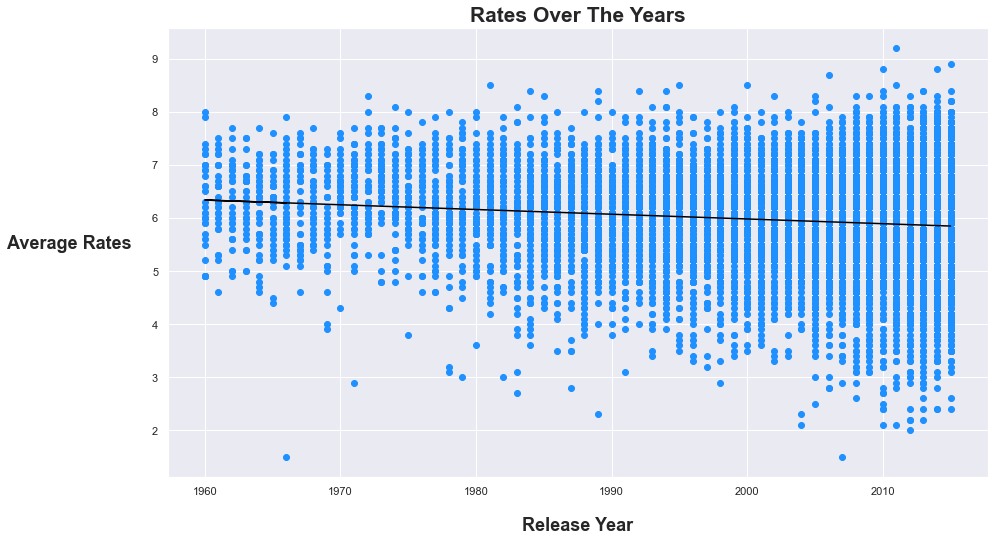

In [29]:
plt.figure(figsize=[14.70, 8.27])
graph = plt.scatter(imdb['release_year'], imdb['vote_average'],color='dodgerblue')
plt.plot(imdb["release_year"], np.poly1d(np.polyfit(imdb['release_year'], imdb['vote_average'], 1))(imdb['release_year']), color = 'black')
# plt.grid(alpha=0)
plt.xlabel("Release Year",fontsize=18, labelpad=20, weight='bold')
plt.ylabel("Average Rates",fontsize=18,rotation=0,ha="right", labelpad=20, weight='bold')
plt.title("Rates Over The Years",fontsize=21, weight='bold');

#### We can determine that the relationship is strong at the lower rates because it highly decreased over the years but it is a medium relation at the higher rates because it slightly increased, and overall we facing a decrease in rates lately.

# So what is the top 10 rated movies ?

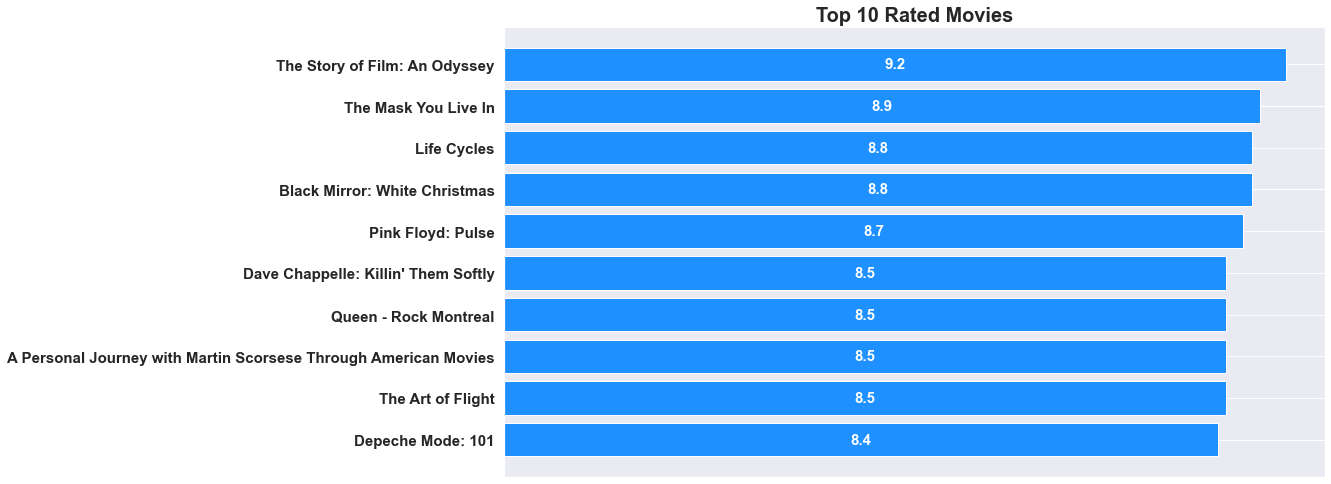

In [103]:
# Top 5 Rated movies
fig, ax = plt.subplots(figsize=[14.70, 8.27])
top10 = imdb[["original_title", "vote_average"]]
top10 = top10.nlargest(10,'vote_average',keep='last')
plt.barh(top10['original_title'],top10['vote_average'], color='dodgerblue')
ax.bar_label(ax.containers[0],fontsize=15 ,color='white', fontweight='bold',label_type='center', fmt='%.1f')
ax.set_xticks([])
plt.title("Top 10 Rated Movies",fontweight='bold',fontsize=20)
plt.yticks(fontweight='bold',fontsize=15)
plt.gca().invert_yaxis()
plt.show();

# Also let's check the top 10 directors by average rate.

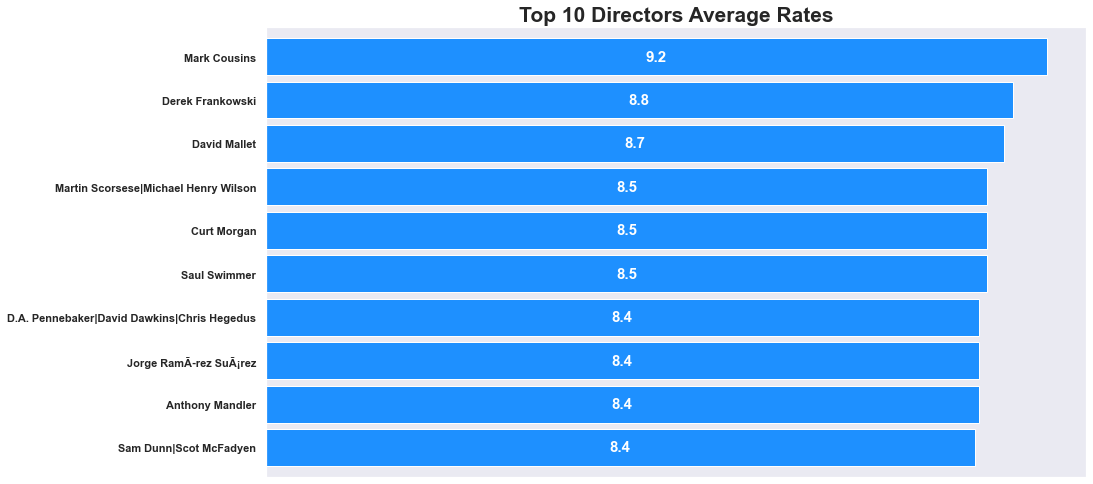

In [109]:
fig, ax = plt.subplots(figsize=[14.70, 8.27])
io = imdb.groupby(['director'])["vote_average"].mean().sort_values().tail(10)
io.plot(x="director",kind="barh",color='dodgerblue', zorder=2, width=0.85)

plt.grid(alpha=0)
plt.title("Top 10 Directors Average Rates",fontsize=21, weight='bold')
plt.ylabel(None)
plt.yticks(fontweight='bold')
ax.bar_label(ax.containers[0],fontsize=15 ,color='white', fontweight='bold',label_type='center', fmt='%.1f')
ax.set_xticks([])
plt.show();

#### After looking at the director's shape we will determine that mark cousins is the best director based on the rates he gained.

# It is time to answer an interesting question. What is the dominant movie genre?

> We will use a bar chart to determine the highest genre used in the movies.

> The next shape shows movie count associated to each genre.

In [39]:
imdb["genres"].replace("|"," | ",inplace=True)

In [40]:
imdb["genres"].value_counts()

Drama                                      711
Comedy                                     707
Documentary                                306
Drama|Romance                              289
Comedy|Drama                               280
                                          ... 
Action|Thriller|Science Fiction|Mystery      1
Comedy|Music|Romance|Foreign                 1
Documentary|Drama|Comedy                     1
Fantasy|Drama|Science Fiction|Family         1
Mystery|Science Fiction|Thriller|Drama       1
Name: genres, Length: 2031, dtype: int64

In [41]:
true = (imdb["genres"].str.contains("\|"))==True

In [42]:
Action = imdb[imdb['genres'].str.contains('Action')].count()

In [43]:
Action['genres'].sum()

2378

In [44]:
War = imdb[imdb['genres'].str.contains('War')].count()
Comedy = imdb[imdb['genres'].str.contains('Comedy')].count()
Science = imdb[imdb['genres'].str.contains('Science')].count()
Thriller = imdb[imdb['genres'].str.contains('Thriller')].count()
Drama = imdb[imdb['genres'].str.contains('Drama')].count()
Horror = imdb[imdb['genres'].str.contains('Horror')].count()
Western = imdb[imdb['genres'].str.contains('Western')].count()
Romance = imdb[imdb['genres'].str.contains('Romance')].count()
Family = imdb[imdb['genres'].str.contains('Family')].count()
Crime = imdb[imdb['genres'].str.contains('Crime')].count()
ScienceFiction = imdb[imdb['genres'].str.contains('Science Fiction')].count()
Fantasy = imdb[imdb['genres'].str.contains('Fantasy')].count()
History = imdb[imdb['genres'].str.contains('History')].count()
Foreign = imdb[imdb['genres'].str.contains('Foreign')].count()
Adventure = imdb[imdb['genres'].str.contains('Adventure')].count()
Action = imdb[imdb['genres'].str.contains('Action')].count()
Documentary = imdb[imdb['genres'].str.contains('Documentary')].count()

In [45]:
data = {'Genre':['Comedy', 'War', 'Science', 'Thriller', 'Drama', 'Horror', 'Western', 'Family', 'Romance', 'Crime',
                 'ScienceFiction', 'Fantasy','History','Foreign','Adventure','Action','Documentary'],
        'Count':[Comedy['genres'].sum(),War['genres'].sum(),Science['genres'].sum(), Thriller['genres'].sum(),
                 Drama['genres'].sum(),Horror['genres'].sum(),Western['genres'].sum(),Family['genres'].sum(),
                 Romance['genres'].sum(),Crime['genres'].sum(),ScienceFiction['genres'].sum(),Fantasy['genres'].sum(),
                 History['genres'].sum(),Foreign['genres'].sum(),Adventure['genres'].sum(),Action['genres'].sum(),
                 Documentary['genres'].sum()]}
df = pd.DataFrame(data)
df.sort_values(by=['Count'], ascending=False,inplace=True)

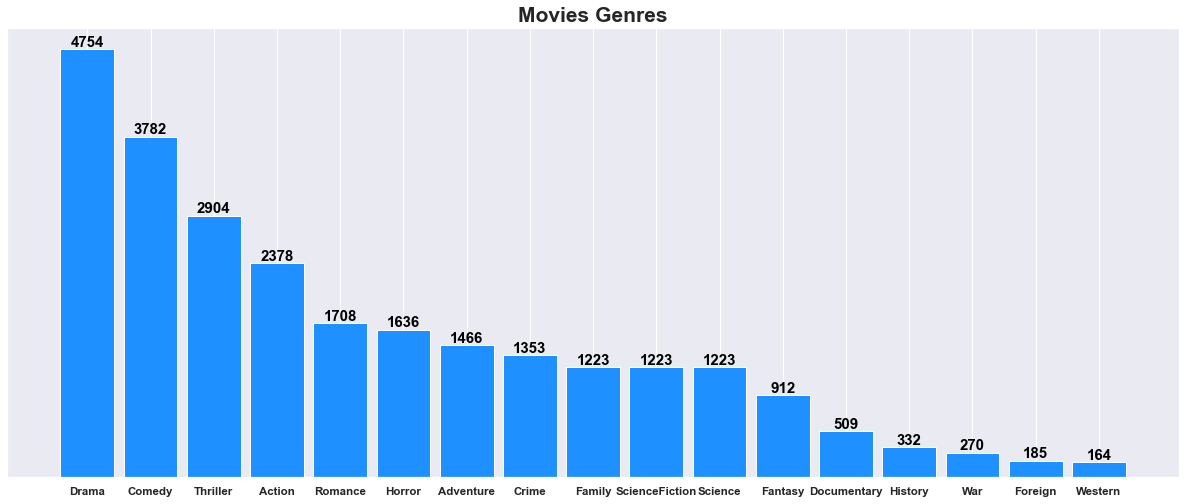

In [46]:
fig, ax = plt.subplots(figsize=[21, 8.27])

ax.bar(df['Genre'], df['Count'], color='dodgerblue', zorder=2, width=.85)

ax.set_xticks(df['Genre'])
ax.set_xticklabels(df['Count'])

# plt.grid(alpha=0)
# plt.xlabel("Genres",fontsize=18, labelpad=20, weight='bold')
plt.title("Movies Genres",fontsize=21, weight='bold')
plt.xticks(rotation=0, weight='bold',fontsize=11.5)
locs, labels = plt.xticks()
plt.xticks(locs, df["Genre"])
ax.bar_label(ax.containers[0],color='black', weight='bold',label_type='edge',fontsize=15)
ax.set_yticks([])
plt.show();

#### From this shape, we can determine that the Drama has the most movies produced over the years and the minimum is the Western genre.

# Let's talk about the revenues a little a bit to know the most profitable period in movies production.

#### We will use the line chart to know the revenue levels over the years.

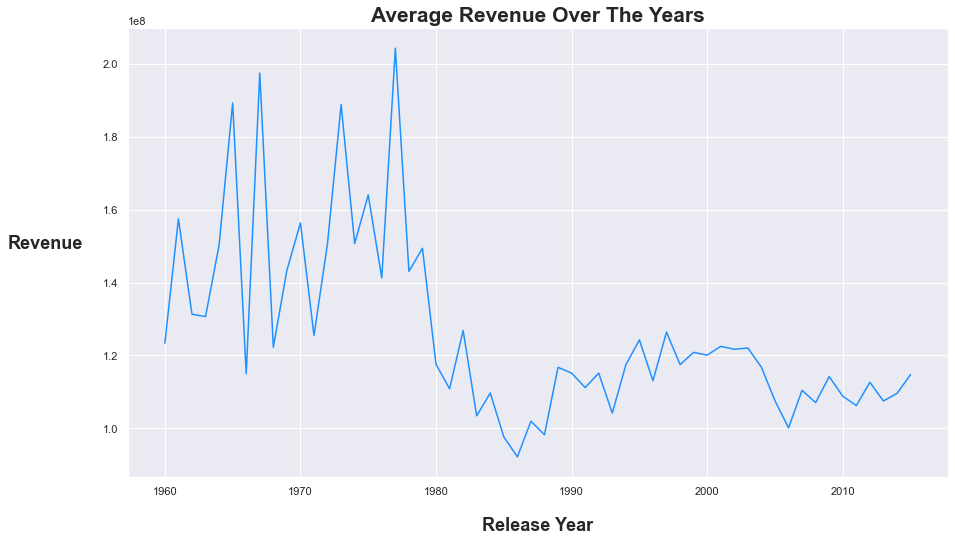

In [33]:
tS = imdb['revenue_adj'].groupby(imdb['release_year']).mean()
tS.plot(kind='line',figsize=[14.70, 8.27],color='dodgerblue')
#plt.grid(alpha=0)
plt.xlabel("Release Year",fontsize=18, labelpad=20, weight='bold')
plt.ylabel("Revenue",fontsize=18,rotation=0,ha="right", labelpad=20, weight='bold')
plt.title("Average Revenue Over The Years",fontsize=21, weight='bold')
plt.show();

#### We can determine that approximately from the period of 1960 to 1978 have a very volatile revenue level and also scored the highest values, while from 1979 to 2015 has less volatile and lower revenue levels overall.

# So, What are the top 5 movies by revenue? That's what we will know right now...

#### We will use pie chart to shows the top 5 movies made a profit.

In [35]:
highest_revenue = imdb[["original_title", "revenue_adj"]]

In [36]:
highest_revenue.nlargest(5, "revenue_adj", keep='last')

,original_title,revenue_adj
1386,Avatar,2.827124e+09
1329,Star Wars,2.789712e+09
5231,Titanic,2.506406e+09
10594,The Exorcist,2.167325e+09
9806,Jaws,1.907006e+09


In [37]:
highest5movies_revenue = highest_revenue.nlargest(5, "revenue_adj", keep='last')

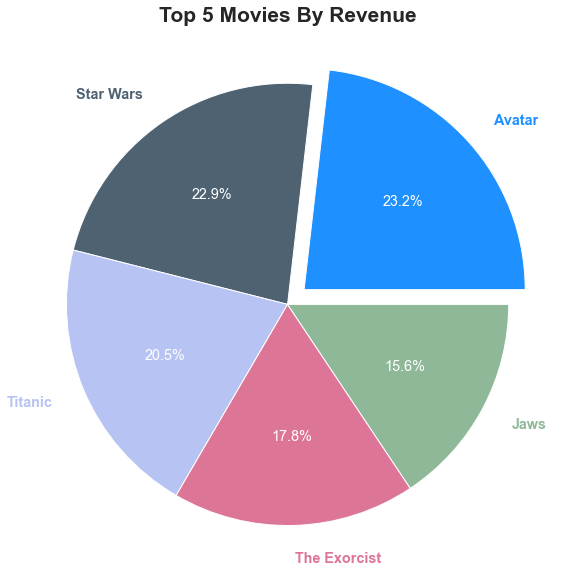

In [38]:
plt.figure(figsize=[14.70, 8.27])
df = highest5movies_revenue[["original_title", "revenue_adj"]]
# Create a set of colors
color = ['dodgerblue','#4F6272', '#B7C3F3', '#DD7596', '#8EB897']

patches, texts, pcts = plt.pie(df['revenue_adj'], labels=df['original_title'],autopct='%.1f%%',textprops={'size': 'x-large'}, labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, explode=(0.1, 0, 0, 0,0), colors=color)

# Set the labels colors to the pie colors
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)

plt.title("Top 5 Movies By Revenue",fontsize=21, weight='bold')

plt.tight_layout()
plt.show();

#### Now, we can determine the top 5 movies making a profit and the highest movie made a profit is Avatar.

# We need to know if there is a relation between the revenue and vote_average as it is expected to be a positive relation, but let's check our thoughts through the data.

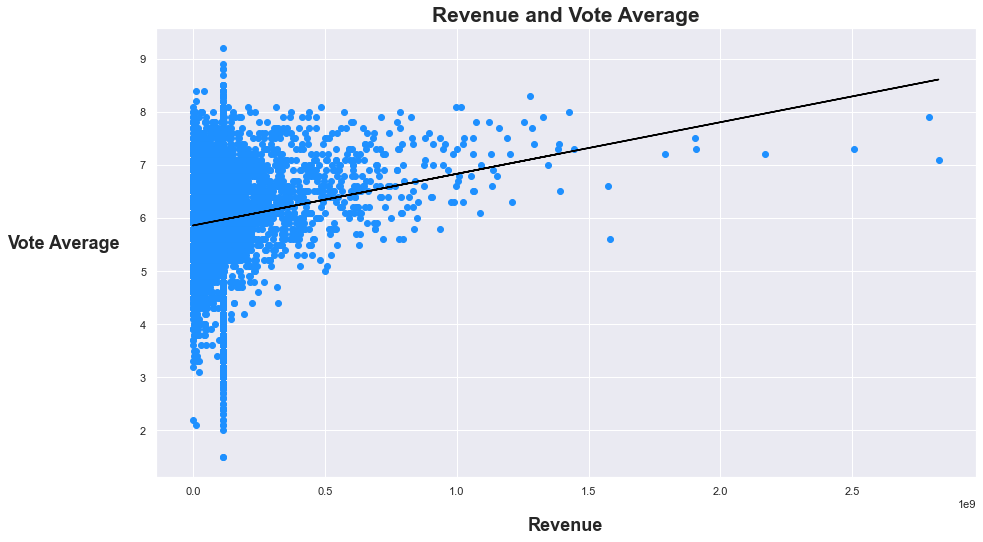

In [32]:
plt.figure(figsize=[14.70, 8.27])
plt.scatter(imdb['revenue_adj'], imdb['vote_average'], color='dodgerblue')

plt.plot(imdb['revenue_adj'], np.poly1d(np.polyfit(imdb['revenue_adj'], imdb['vote_average'], 1))(imdb['revenue_adj']), color = 'black')
plt.xlabel("Revenue",fontsize=18, labelpad=20, weight='bold')
plt.ylabel("Vote Average",fontsize=18,rotation=0,ha="right", labelpad=20, weight='bold')
plt.title("Revenue and Vote Average",fontsize=21, weight='bold')
plt.show();

#### We can easily see an increase in revenue when rates increase as expected.

# What about the director's average revenue they made by the movies they directed?

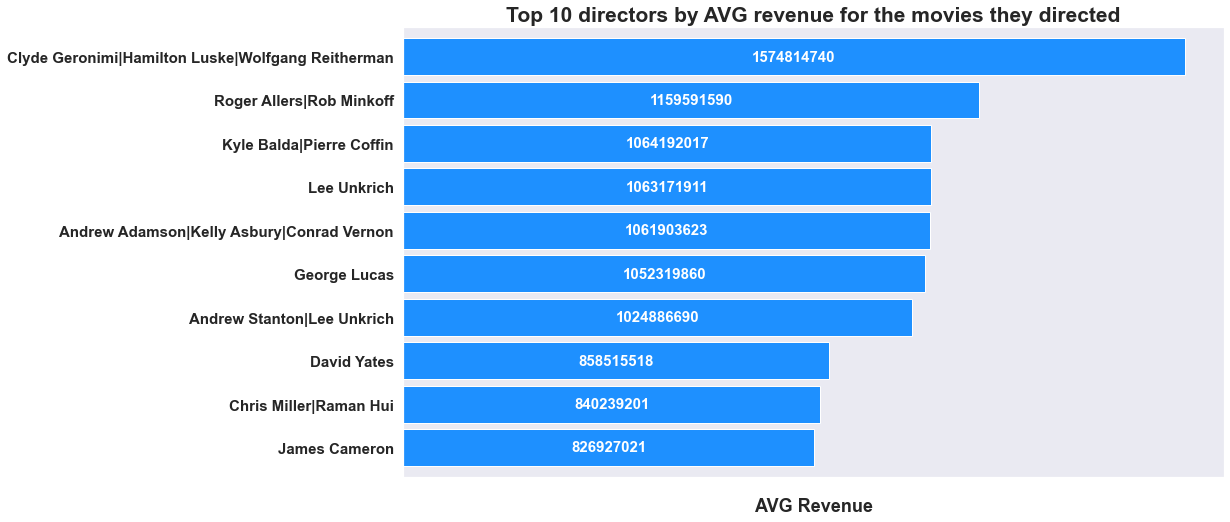

In [105]:
fig, ax = plt.subplots(figsize=[14.70, 8.27])

oi = imdb.groupby(['director'])["revenue_adj"].mean().sort_values().tail(10)
oi.plot(x="director",kind="barh",color='dodgerblue', zorder=2, width=0.85)

plt.grid(alpha=0)
# plt.xticks(None)
plt.xlabel("AVG Revenue",fontsize=18, labelpad=20, weight='bold')
plt.yticks(fontweight='bold',fontsize=15)
plt.ylabel(None)
plt.title("Top 10 directors by AVG revenue for the movies they directed",fontsize=21, weight='bold')
ax.bar_label(ax.containers[0],fontsize=15, color='white', fontweight='bold',label_type='center', fmt='%.f')
ax.set_xticks([])
plt.show();

#### We now can determine the top 10 directors making a profit for their movies so, we can call them the most successful directors.

# What about the top 10 directors by TOTAL revenue and the count of movies they directed.

In [48]:
imdb.groupby(['director'])["revenue_adj"].sum().sort_values(ascending=False).head(10)

director
Steven Spielberg    1.543269e+10
James Cameron       7.442343e+09
Peter Jackson       7.250092e+09
George Lucas        6.313919e+09
Robert Zemeckis     5.885893e+09
Michael Bay         5.460672e+09
Chris Columbus      5.324322e+09
Ron Howard          4.987585e+09
Tim Burton          4.874652e+09
Clint Eastwood      4.580668e+09
Name: revenue_adj, dtype: float64

In [49]:
locs = ['Steven Spielberg','James Cameron','Peter Jackson','George Lucas','Robert Zemeckis',
        'Michael Bay','Chris Columbus','Ron Howard','Tim Burton','Clint Eastwood']

top10rev = imdb.loc[imdb['director'].isin(locs)]
top10rev_counts = top10rev['director'].value_counts()
top10rev_counts


Clint Eastwood      34
Steven Spielberg    29
Ron Howard          22
Tim Burton          19
Robert Zemeckis     17
Chris Columbus      14
Peter Jackson       13
Michael Bay         11
James Cameron        9
George Lucas         6
Name: director, dtype: int64

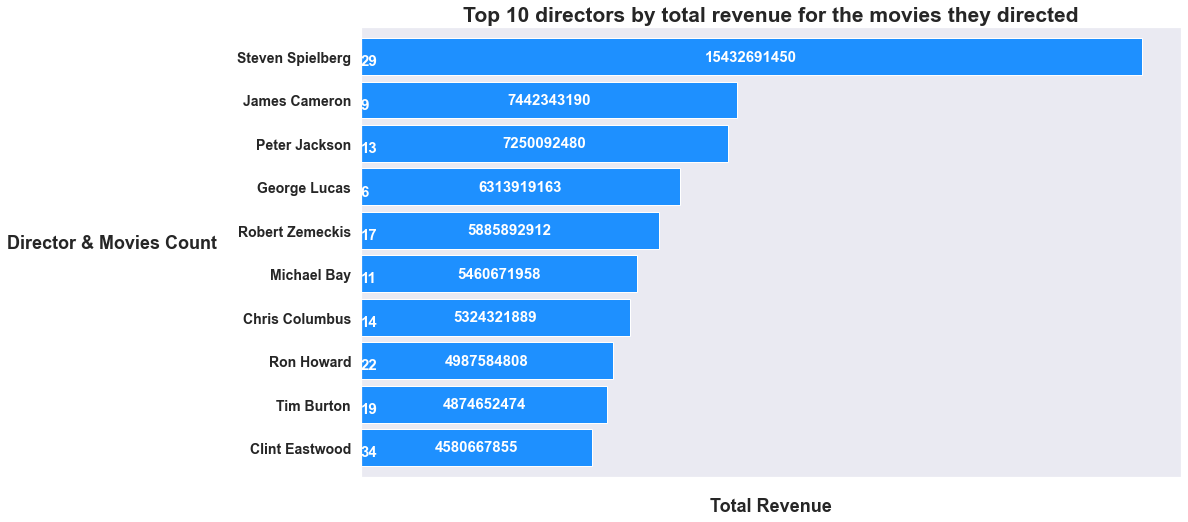

In [108]:
fig, ax = plt.subplots(figsize=[14.70, 8.27])
y = [34,19,22,14,11,17,6,13,9,29]

oi = imdb.groupby(['director'])["revenue_adj"].sum().sort_values()
oi.tail(10).plot(x="director",kind="barh",color='dodgerblue', zorder=2, width=0.85)

for index, value in enumerate(y):
    plt.text(value, index-0.20, str(value), fontweight='bold',fontsize=15, color='white')
# x = 0
# s = 10
# plt.text(x,s,'Movies They directed' ,ma='center',ha='left')

plt.grid(alpha=0)
plt.xlabel("Total Revenue",fontsize=18, labelpad=20, weight='bold')
plt.ylabel("Director & Movies Count",fontsize=18,rotation=0,ha="right", labelpad=20, weight='bold')
plt.title("Top 10 directors by total revenue for the movies they directed",fontsize=21, weight='bold')
plt.yticks(fontsize=14,fontweight='bold')
ax.bar_label(ax.containers[0],fontsize=15, color='white', fontweight='bold',label_type='center', fmt='%.f')
ax.set_xticks([])
plt.show();

#### We can see the total revenue for the top 10 directors for the movies they directed and we can notice that there is some of them have a huge number of movies but a low amount of revenue so this chart will not determine the most successful directors as the last one.

# By the end of our analysis, we will have a tour with the budget, let's begin with the budget distribution over the years to see the trend.

#### We will use line chart to know if the production companies spend more budgets on movies lately or not.

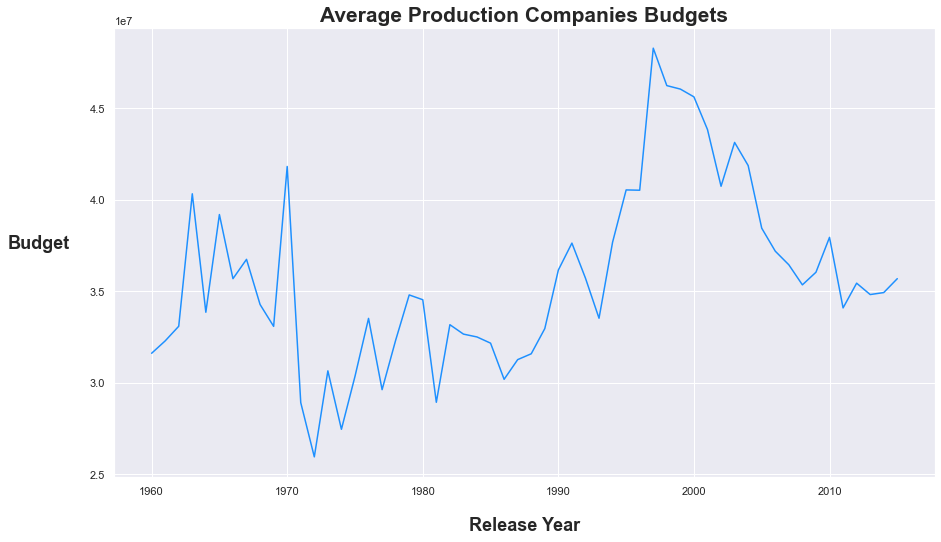

In [34]:
BudgetTimeSeries = imdb['budget_adj'].groupby(imdb['release_year']).mean()
BudgetTimeSeries.plot(kind='line',figsize=[14.70, 8.27],color='dodgerblue')
#plt.grid(alpha=0)
plt.xlabel("Release Year",fontsize=18, labelpad=20, weight='bold')
plt.ylabel("Budget",fontsize=18,rotation=0,ha="right", labelpad=20, weight='bold')
plt.title("Average Production Companies Budgets",fontsize=21, weight='bold')
plt.show();

#### We can determine that overall the production companies spend a mid to high budget for movies produce lately and we can see the period approximately from 1995 to 2000 is the highest budgets spent from the production companies.

# What about the relation between the budget and vote_average?

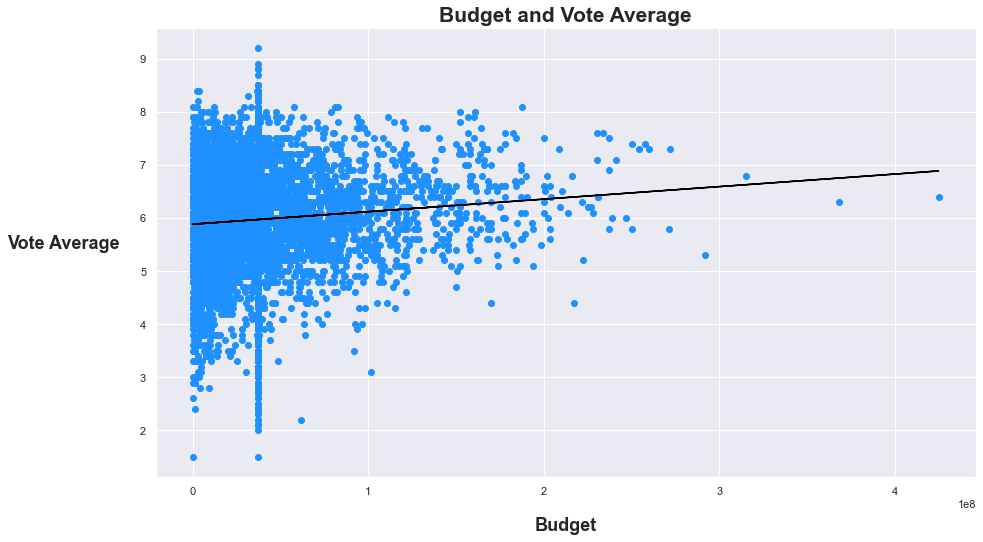

In [31]:
plt.figure(figsize=[14.70, 8.27])
plt.scatter(imdb['budget_adj'], imdb['vote_average'], color='dodgerblue')

plt.plot(imdb['budget_adj'], np.poly1d(np.polyfit(imdb['budget_adj'], imdb['vote_average'], 1))(imdb['budget_adj']), color = 'black')
plt.xlabel("Budget",fontsize=18, labelpad=20, weight='bold')
plt.ylabel("Vote Average",fontsize=18,rotation=0,ha="right", labelpad=20, weight='bold')
plt.title("Budget and Vote Average",fontsize=21, weight='bold')
plt.show()

#### We can see that there is a slight correlation between the budget and rates. however, the higher movies rates have a low budget.

<a id='conclusions'></a>
## Conclusions

### Results: Our data leads us to:
> We answered some important questions that provided us a valuable information about movies.

> We determined that over the years and increasing the number of movies more low rates came 
out and slightly a small number of higher rates.
> We figured out that the most highest movie rates are between 5/10 to 7/10 approximately and the highest rate givin to the movies is 6.1/10.
> We can determine that approximately from the period of 1960 to 1978 have a very volatile revenue level and also scored the highest values, while from 1979 to 2015 has less volatile and lower revenue levels overall.
> We determined that the movie profits is slightly increased over the years.
> We determined that the production companies spend a higher budget for movies produce over the years.
> We figured out the top 5 movies made a profit and the highest one is "Avatar".
> We figured out the top 10 rated movies.
> We figured out that the highest movie genre is the drama.
> We figured out the top 10 directors by rates and the highest one is Mark Cousins.
> The Highest movie rate is for The Story of Film: An Odyssey by 9.2/10 and it have only 14 rates and it is misleading to the top movie so the movie after this movie has 8.4 rate and not a little amount of rates by 5754 is The Shawshank Redemption for the director Frank Darabont.
> Woody Allen has the highest number of movies directed by 45 movie.
> We can determine the top 10 successful directors made a profit for the movies they directed.
> The average revenue for all movies is higher than the average budget by 35 million dollars approximately, so we can determine that movie production is a profitable field.
> The average runtime for the movies is 1.7 hours.
> We have also strange information that there are movies that have a 900 minutes runtime!
> We determined the relationship between the budget and vote_average as well as between the revenue and vote_average.

## limitations: There are a couple of limitations faced our analysis:
<ol>
<li> Most of our data is categorical which limits us to make correlations between factors</li>
<li> There are a lot of null values, misleading data, and outliers, which these samples are not an effective representation of the population.</li>
</ol>

###### I used Stack Overflow ,GeeksforGeeks ,Seaborn documentation ,Data to Fish and pandas documentation.

In [49]:
!jupyter nbconvert Investigate_a_Dataset.ipynb --to slides --no-input

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to pdf
[NbConvertApp] Support files will be in Investigate_a_Dataset_files\
[NbConvertApp] Making directory .\Investigate_a_Dataset_files
[NbConvertApp] Making directory .\Investigate_a_Dataset_files
[NbConvertApp] Making directory .\Investigate_a_Dataset_files
[NbConvertApp] Making directory .\Investigate_a_Dataset_files
[NbConvertApp] Making directory .\Investigate_a_Dataset_files
[NbConvertApp] Making directory .\Investigate_a_Dataset_files
[NbConvertApp] Making directory .\Investigate_a_Dataset_files
[NbConvertApp] Making directory .\Investigate_a_Dataset_files
[NbConvertApp] Making directory .\Investigate_a_Dataset_files
[NbConvertApp] Making directory .\Investigate_a_Dataset_files
[NbConvertApp] Making directory .\Investigate_a_Dataset_files
[NbConvertApp] Making directory .\Investigate_a_Dataset_files
[NbConvertApp] Writing 68641 bytes to notebook.tex
[NbConvertApp] Building PDF
Traceback (most recent call last):
  F